In [1]:
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
def parse_box(s):
    pts = np.array([int(x) for x in s.strip("\ufeff").split(",")[:8]])
    xs = pts[0::2]
    ys = pts[1::2]
    x1, x2 = xs.min(), xs.max()
    y1, y2 = ys.min(), ys.max()
    return np.array([x1, y1, x2, y2])

def load_boxes(p):
    lines = Path(p).read_text().strip("\n").split("\n")
    boxes = list(map(parse_box, lines))
    return boxes

def draw_box(img, boxes):
    for b in boxes:
        b = b.astype(int)
        img = cv2.rectangle(img, (b[0], b[1]), (b[2], b[3]), (255, 0, 0), 2)
    return img

In [10]:
img = plt.imread("/datasets/e2e/train/img_1.jpg")
boxes = load_boxes("/datasets/e2e/train/gt_img_1.txt")

In [11]:
# !ls /datasets/e2e/train/

(-0.5, 409.5, 449.5, -0.5)

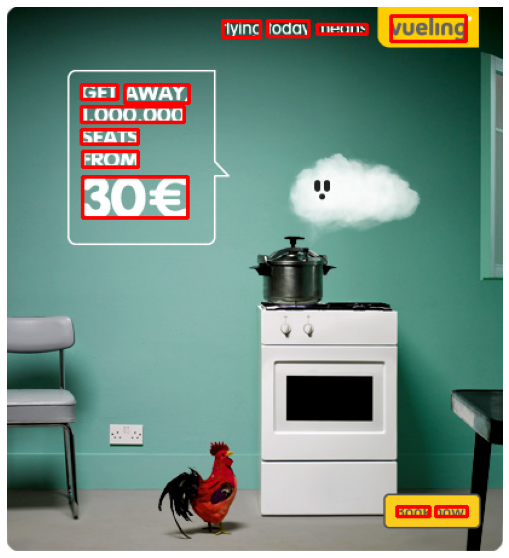

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(draw_box(img, boxes))
plt.axis("off")